## 2. KDE

### Task 1 : KDE Class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

class KDE:
    def __init__(self, kernel_type='gaussian', bandwidth=1.0):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth
        self.data = None
        
    def fit(self, data):
        self.data = np.array(data)
        return self
        
    def kernel(self, u):
        if self.kernel_type == 'box':
            # For multivariate box kernel, all dimensions must be within [-1,1]
            return 0.5 * np.all(np.abs(u) <= 1, axis=-1).astype(float)
        elif self.kernel_type == 'gaussian':
            # Multivariate Gaussian kernel
            return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * np.sum(u ** 2, axis=-1))
        elif self.kernel_type == 'triangular':
            # Multivariate triangular kernel
            return np.maximum(1 - np.sqrt(np.sum(u ** 2, axis=-1)), 0)
    
    def predict(self, X):
        X = np.array(X)
        
        # Ensure X is 2D: (n_samples, n_features)
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        
        n_samples = len(self.data)
        n_features = self.data.shape[1]
        
        # Compute scaled differences for all pairs of points
        # Reshape X and self.data to enable broadcasting
        diff = (X[:, np.newaxis, :] - self.data[np.newaxis, :, :]) / self.bandwidth
        
        # Apply kernel function to all differences at once
        densities = self.kernel(diff)
        
        # Sum over all training points and normalize
        density = np.sum(densities, axis=1) / (n_samples * self.bandwidth ** n_features)
        
        return density

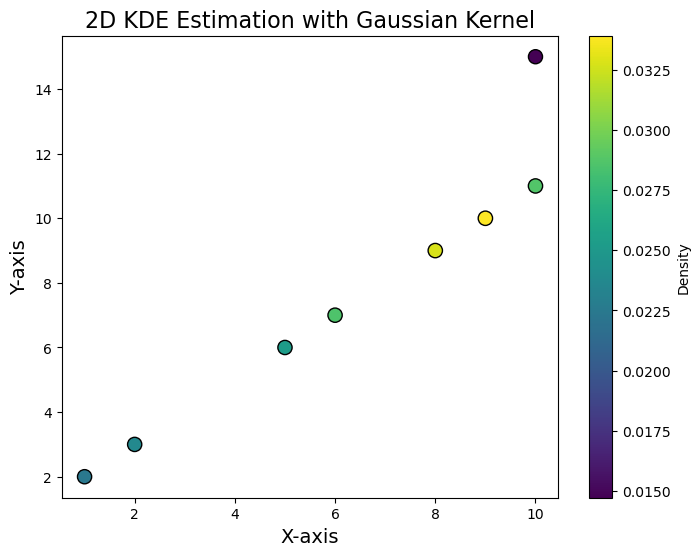

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

class KDE:
    def __init__(self, kernel_type='gaussian', bandwidth=1.0):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth
        self.data = None
        
    def fit(self, data):
        self.data = np.array(data)
        return self
        
    def kernel(self, u):
        if self.kernel_type == 'box':
            # For multivariate box kernel, all dimensions must be within [-1,1]
            return 0.5 * np.all(np.abs(u) <= 1, axis=-1).astype(float)
        elif self.kernel_type == 'gaussian':
            # Multivariate Gaussian kernel
            return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * np.sum(u ** 2, axis=-1))
        elif self.kernel_type == 'triangular':
            # Multivariate triangular kernel
            return np.maximum(1 - np.sqrt(np.sum(u ** 2, axis=-1)), 0)
    
    def predict(self, X):
        X = np.array(X)
        
        # Ensure X is 2D: (n_samples, n_features)
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        
        n_samples = len(self.data)
        n_features = self.data.shape[1]
        
        # Compute scaled differences for all pairs of points
        # Reshape X and self.data to enable broadcasting
        diff = (X[:, np.newaxis, :] - self.data[np.newaxis, :, :]) / self.bandwidth
        
        # Apply kernel function to all differences at once
        densities = self.kernel(diff)
        
        # Sum over all training points and normalize
        density = np.sum(densities, axis=1) / (n_samples * self.bandwidth ** n_features)
        
        return density

X = np.array([[1, 2], [2, 3], [5, 6], [6, 7], [10, 15], [8, 9], [9, 10], [10, 11]])

kde = KDE(kernel_type='gaussian', bandwidth=2)
kde.fit(X)

density = kde.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=density, cmap='viridis', s=100 + density * 200, edgecolor='k')
plt.colorbar(label='Density')
plt.title('2D KDE Estimation with Gaussian Kernel', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.show()

### Task 2 : Generate Synthetic Data

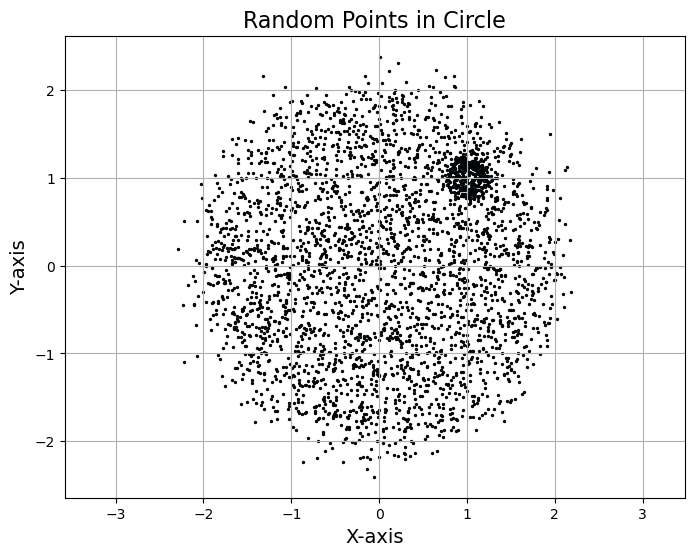

In [ ]:
def generate_random_in_circle(radius = 1,offset = 0):
    r = radius * np.sqrt(np.random.rand())
    theta = np.random.rand() * 2 * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x+offset, y+offset

radius = 2
big_circle = np.array([generate_random_in_circle(radius) for _ in range(3000)])
sigma1 = radius * 0.1
big_circle = big_circle + sigma1*np.random.randn(*big_circle.shape)

small_radius = 0.25
small_circle = np.array([generate_random_in_circle(radius=small_radius,offset=1) for _ in range(300)])
sigma2 = small_radius * 0.1
small_circle = small_circle + sigma2*np.random.randn(*small_circle.shape)

X = np.array(list(big_circle) + list(small_circle))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=2, edgecolor='k')
plt.title('Random Points in Circle', fontsize=16)
plt.xlabel('X-axis', fontsize=14)   
plt.ylabel('Y-axis', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.show()

### Task 3 : KDE vs GMM

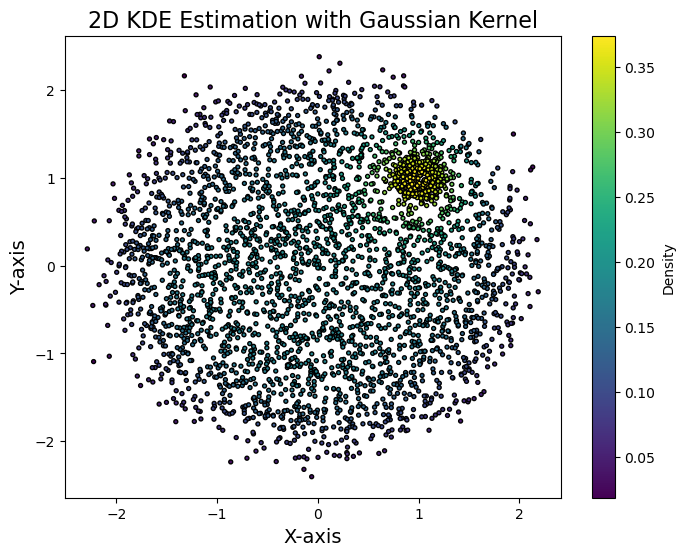

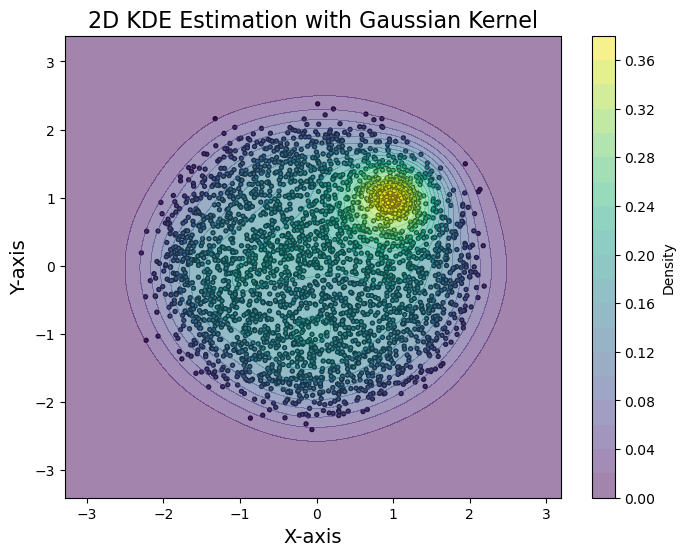

In [55]:
kde = KDE(kernel_type='gaussian', bandwidth=0.4)
kde.fit(X)

density = kde.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=density, cmap='viridis', s=8, edgecolor='k')
plt.colorbar(label='Density')
plt.title('2D KDE Estimation with Gaussian Kernel', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.show()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid_density = kde.predict(np.c_[xx.ravel(), yy.ravel()])
grid_density = grid_density.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=density, cmap='viridis', s=8, edgecolor='k')
plt.contourf(xx, yy, grid_density, 20, cmap='viridis', alpha=0.5)
plt.colorbar(label='Density')
plt.title('2D KDE Estimation with Gaussian Kernel', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.show()


Converged after 104 iterations
[0 0 0 ... 1 1 1]
[9 0]


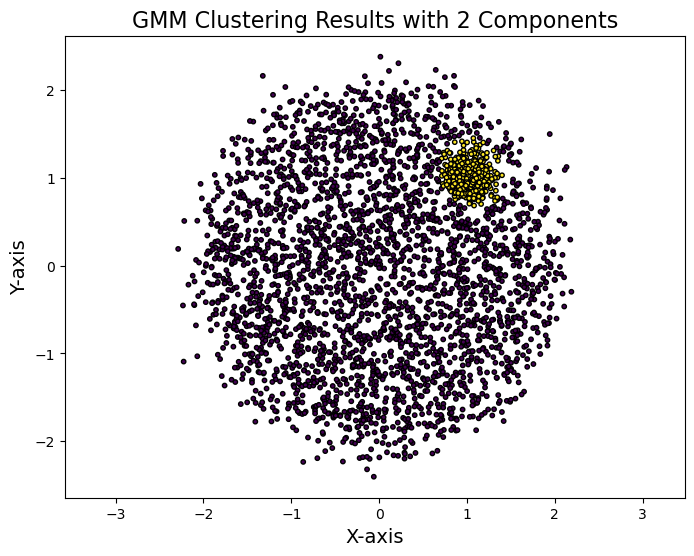

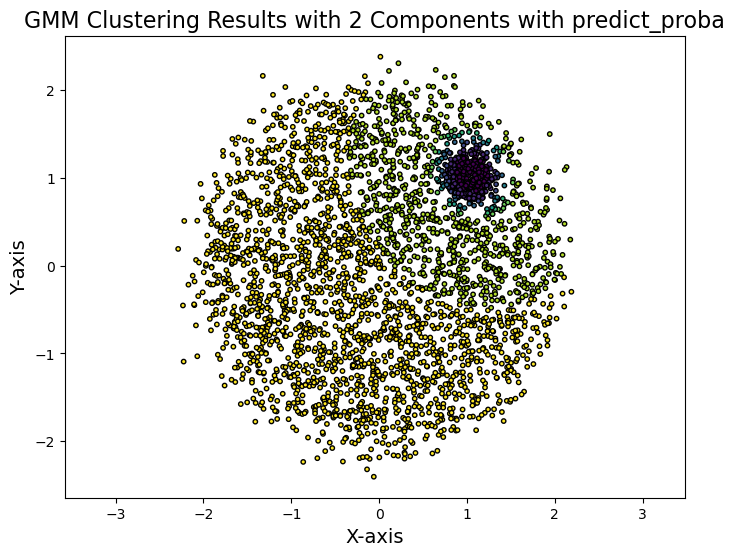

In [6]:
# from sklearn.mixture import GaussianMixture
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
from models.GMM.GMM import GMM

gmm = GMM(k=2)
gmm.fit(X)

cluster = gmm.predict(X)
print(cluster)

prob = gmm.predict_proba(X)

levels = np.digitize(prob, bins=np.linspace(0, 1, 10)) - 1

print(levels[0])

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster, s=10, cmap="viridis", edgecolor='k')
plt.title('GMM Clustering Results with 2 Components', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=levels[:,0], s=10, cmap="viridis", edgecolor='k')
plt.title('GMM Clustering Results with 2 Components with predict_proba', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.axis('equal')
plt.show()

Converged after 134 iterations
[0 0 0 ... 1 1 1]
[9 0]
Converged after 243 iterations
[2 2 2 ... 1 1 1]
[0 0 8]
Converged after 356 iterations
[3 1 1 ... 0 0 0]
[0 0 0 8]
Converged after 119 iterations
[1 0 3 ... 4 4 4]
[0 8 0 0 0]


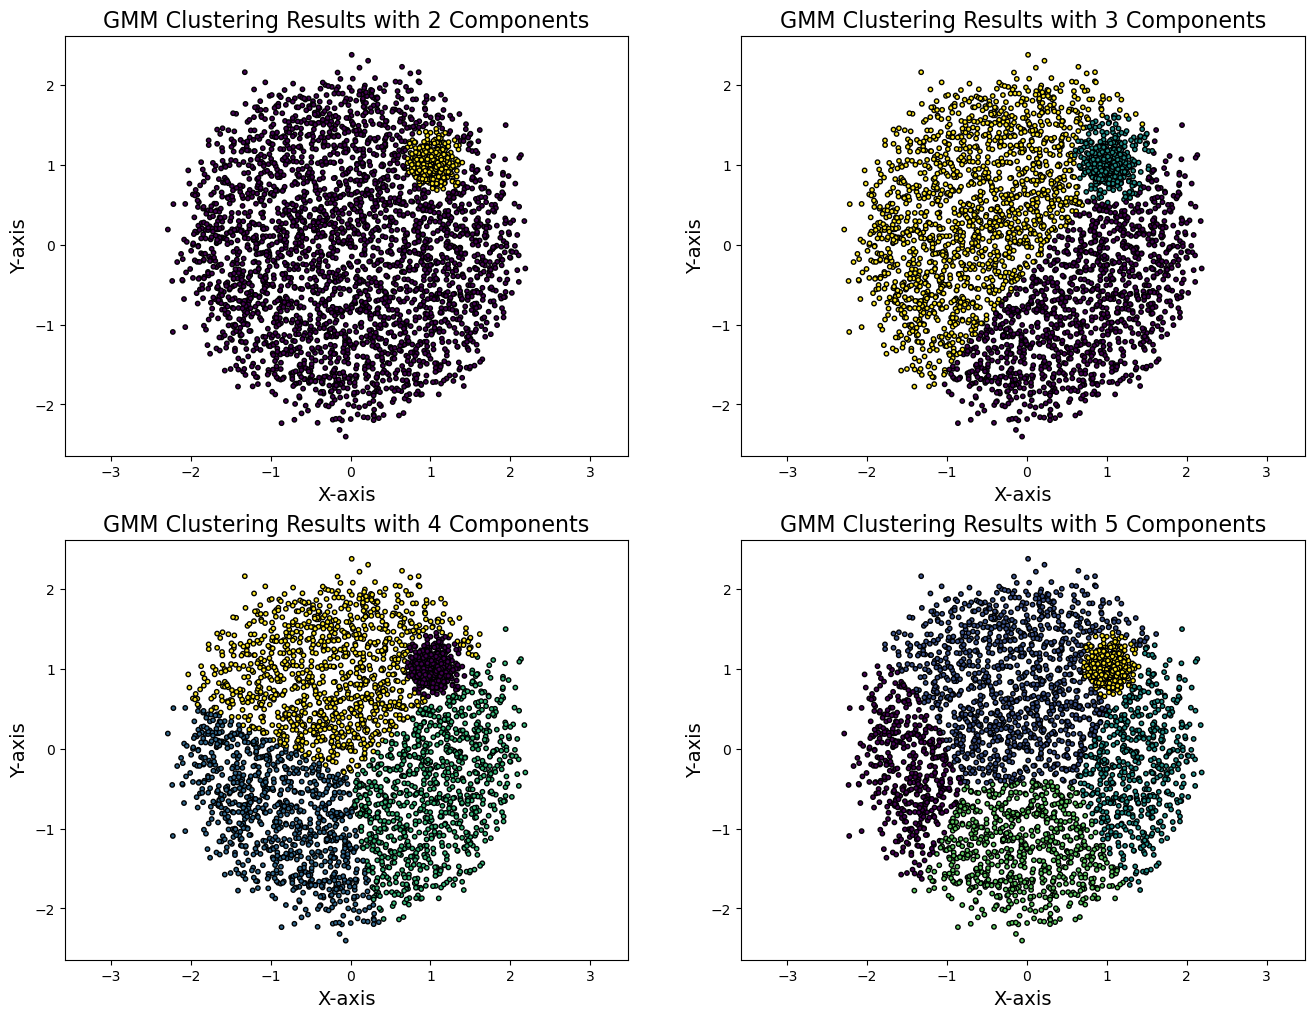

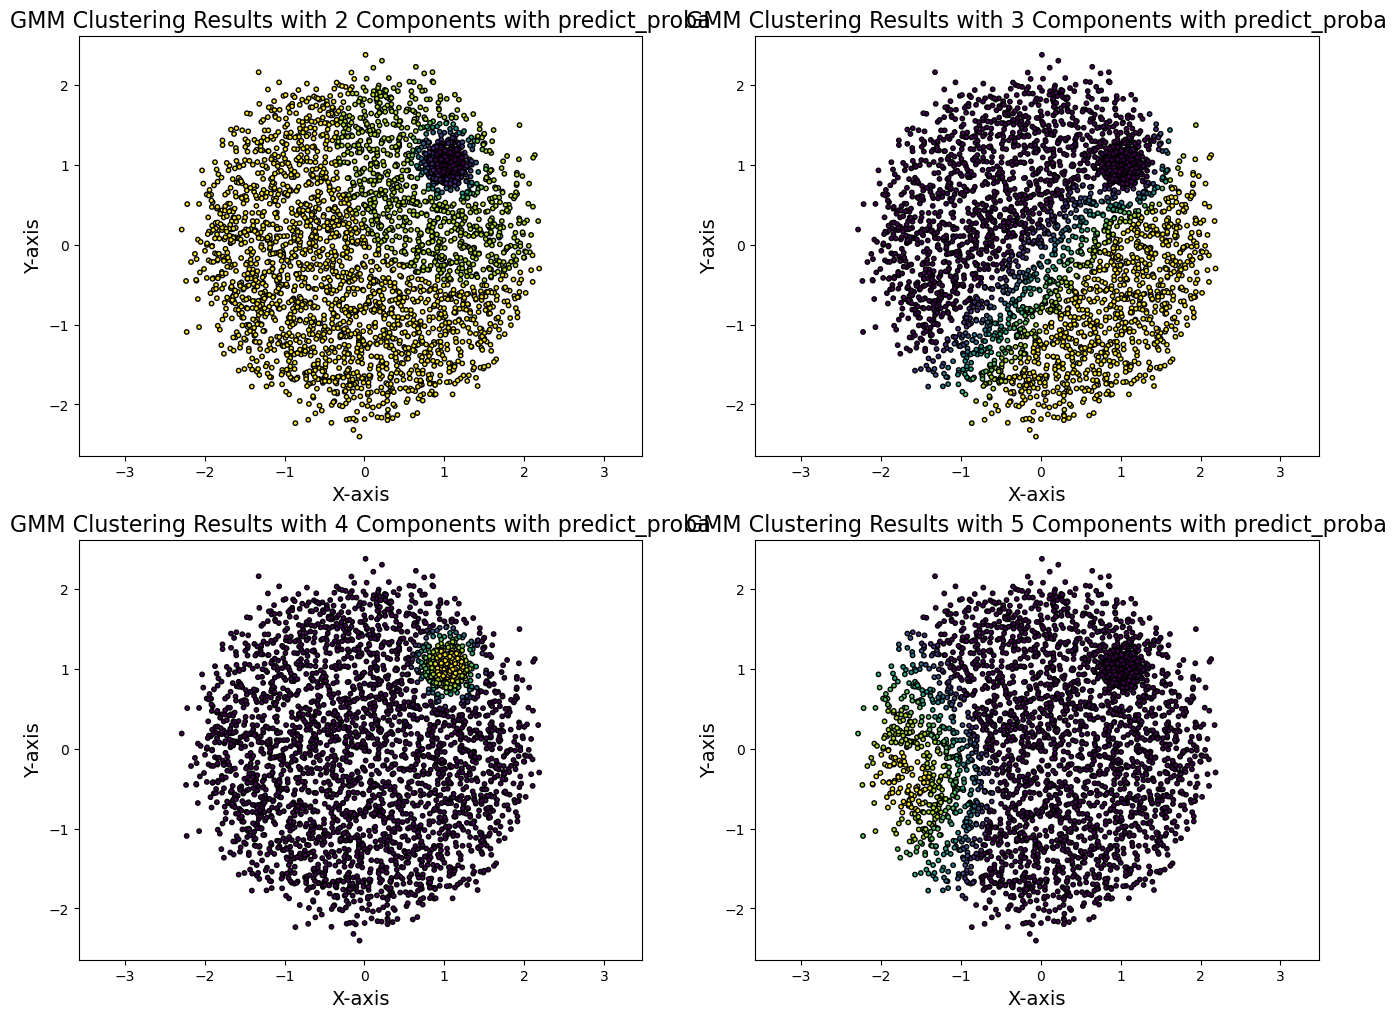

In [7]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))
from models.GMM.GMM import GMM

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

fig2,axes2 = plt.subplots(2, 2, figsize=(16, 12))

for n in np.arange(2, 6):
    gmm = GMM(k=n)
    gmm.fit(X)

    cluster = gmm.predict(X)
    print(cluster)
    
    prob = gmm.predict_proba(X)

    levels = np.digitize(prob, bins=np.linspace(0, 1, 10)) - 1

    print(levels[0])
    
    ax = axes[(n-2)//2, (n-2)%2]  # Select the correct subplot
    ax.scatter(X[:, 0], X[:, 1], c=cluster, s=10, cmap="viridis", edgecolor='k')
    ax.set_title(f'GMM Clustering Results with {n} Components', fontsize=16)
    ax.set_xlabel('X-axis', fontsize=14)
    ax.set_ylabel('Y-axis', fontsize=14)
    ax.axis('equal')
    
    ax2 = axes2[(n-2)//2, (n-2)%2]  # Select the correct subplot
    ax2.scatter(X[:, 0], X[:, 1], c=levels[:,0], s=10, cmap="viridis", edgecolor='k')
    ax2.set_title(f'GMM Clustering Results with {n} Components with predict_proba', fontsize=16)
    ax2.set_xlabel('X-axis', fontsize=14)
    ax2.set_ylabel('Y-axis', fontsize=14)
    ax2.axis('equal')

# Show the plots
plt.show()


## 3. HMM


### 3.1 Speech Digit Recognition

In [8]:
import os 
import sys
import librosa
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','data', 'external' ,'hmm_data'))
print(data_path)

file_path = os.path.join(data_path, os.listdir(data_path)[0]) 
print(file_path)
audio, sr = librosa.load(file_path, sr=None)  

from IPython.display import Audio
Audio(audio, rate=sr)
print(audio.shape)

/home/rohit/Desktop/SMAI/smai-m24-assignments-RohitVarmaSixtyFive/data/external/hmm_data
/home/rohit/Desktop/SMAI/smai-m24-assignments-RohitVarmaSixtyFive/data/external/hmm_data/9_theo_33.wav
(3965,)


In [9]:
# print(data_path)

mfcc_x = []
mfcc_y = []

for audio_file in os.listdir(data_path):
    file_path = os.path.join(data_path, audio_file)
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # print(mfcc.shape)
    # print(mfcc.T.shape)
    mfcc_x.append(mfcc.T)   
    mfcc_y.append(os.path.splitext(audio_file)[0][0])  
    
# np.array(mfcc_x)

(22, 13)
(58039, 13)
(3000,)


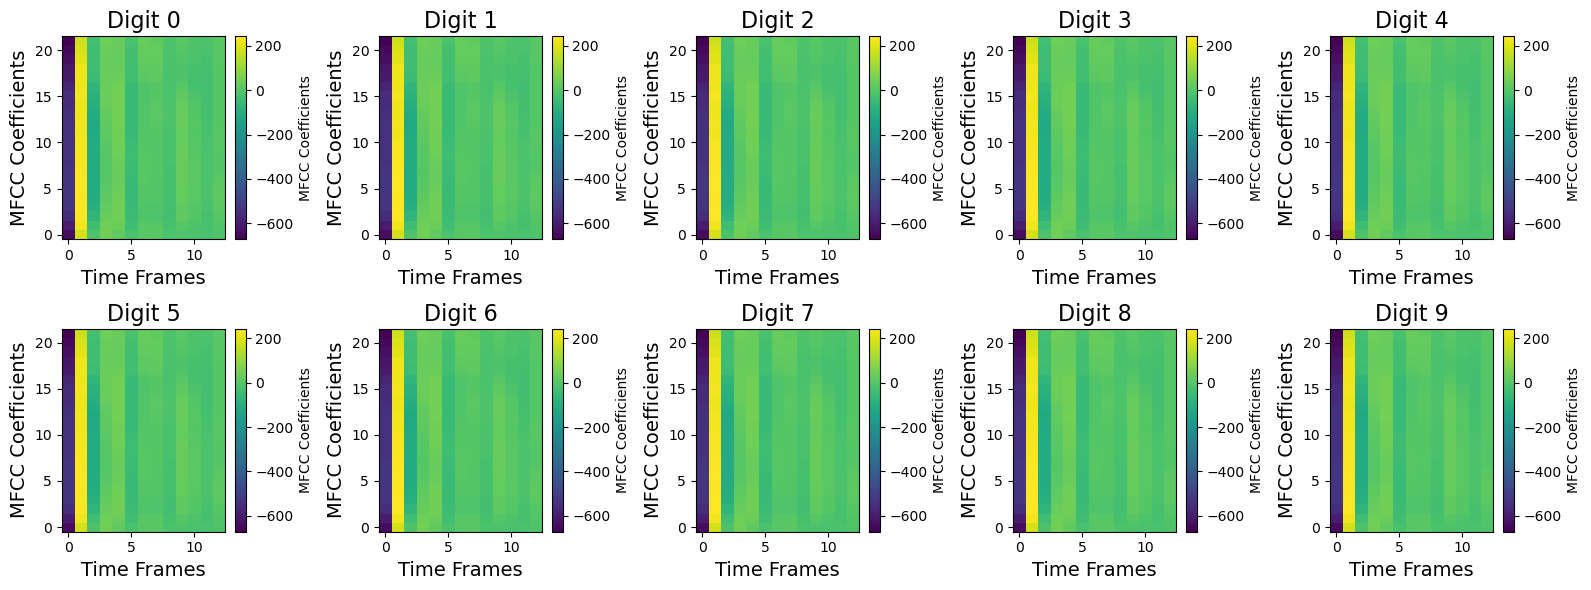

In [10]:
print(mfcc_x[0].shape)
X = np.vstack(mfcc_x)
y = np.array(mfcc_y)

print(X.shape)
print(y.shape)          

plt.figure(figsize=(16, 6))

for digit in range(10):
    plt.subplot(2, 5, digit + 1) 
    digit_indices = [i for i, label in enumerate(mfcc_y) if label == str(digit)]    
    # print(digit_indices)
    avg_mfcc = mfcc_x[0]
    plt.imshow(avg_mfcc, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(label='MFCC Coefficients')
    plt.title(f'Digit {digit}', fontsize=16)
    plt.xlabel('Time Frames', fontsize=14)
    plt.ylabel('MFCC Coefficients', fontsize=14)

plt.tight_layout()
plt.show()

#### Change because the before way isnt compatible to vstack or concatenate appropriately

In [ ]:
import os
import numpy as np
import librosa
from hmmlearn import hmm

digit_mfccs = {str(digit): [] for digit in range(10)}
for filename in os.listdir(data_path):
    if filename.endswith(".wav"):
        digit = filename[0]  
        file_path = os.path.join(data_path, filename)
        y, sr = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc = mfccs.T
        digit_mfccs[digit].append(mfcc)

In [12]:
def manual_train_test_split(data_dict, test_size=0.2):
    train_data = {}
    test_data = {}
    for digit, mfcc_list in data_dict.items():

        n_samples = len(mfcc_list)
        n_test = int(n_samples * test_size)
        
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        test_indices = indices[:n_test]
        train_indices = indices[n_test:]
        
        train_data[digit] = [mfcc_list[i] for i in train_indices]
        test_data[digit] = [mfcc_list[i] for i in test_indices]
    
    return train_data, test_data

train_data, test_data = manual_train_test_split(digit_mfccs, test_size=0.2)

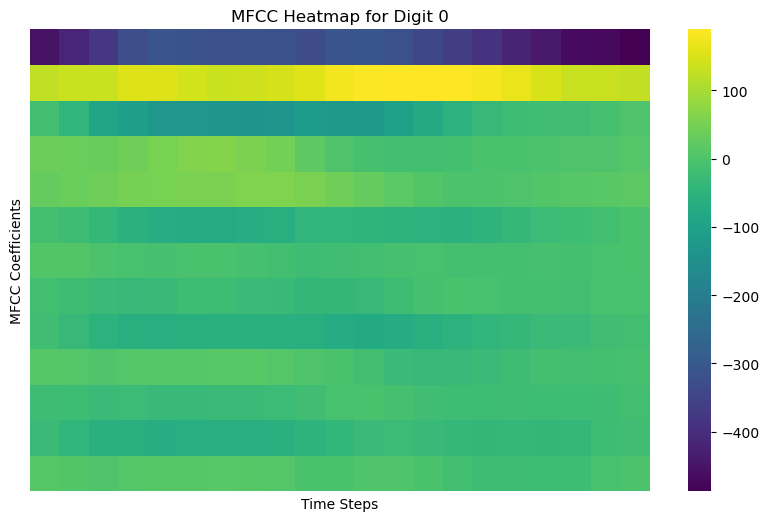

Recognition Accuracy on Test Set: 92.33%


In [15]:
import seaborn as sns

models = {}
for digit, mfcc_list in train_data.items():

    X = np.concatenate(mfcc_list)
    lengths = [len(mfcc) for mfcc in mfcc_list]
    
    model = hmm.GaussianHMM(n_components=7, covariance_type='diag', n_iter=100, random_state=42)
    model.fit(X, lengths)
    models[digit] = model

def visualize_mfccs(mfccs, title="MFCC Heatmap"):
    plt.figure(figsize=(10, 6))
    sns.heatmap(mfccs.T, cmap="viridis", xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.xlabel("Time Steps")
    plt.ylabel("MFCC Coefficients")
    plt.show()

example_digit = "0"
if digit_mfccs[example_digit]: 
    visualize_mfccs(digit_mfccs[example_digit][0], title=f"MFCC Heatmap for Digit {example_digit}")

def evaluate_model(models, test_data):
    correct = 0
    total = 0
    for digit, mfcc_list in test_data.items():
        for mfcc in mfcc_list:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) for model_digit, model in models.items()}
            
            predicted_digit = max(scores, key=scores.get)
            if predicted_digit == digit:
                correct += 1
            total += 1
    return correct / total

accuracy = evaluate_model(models, test_data)
print(f"Recognition Accuracy on Test Set: {accuracy * 100:.2f}%")


 12%|█▎        | 1/8 [00:06<00:46,  6.62s/it]

check
Components: 3, Accuracy: 77.50%


 25%|██▌       | 2/8 [00:15<00:48,  8.01s/it]

check
Components: 4, Accuracy: 85.33%


 38%|███▊      | 3/8 [00:25<00:45,  9.00s/it]

check
Components: 5, Accuracy: 87.83%


 50%|█████     | 4/8 [00:38<00:42, 10.52s/it]

check
Components: 6, Accuracy: 89.83%


 62%|██████▎   | 5/8 [00:54<00:37, 12.46s/it]

check
Components: 7, Accuracy: 91.67%


 75%|███████▌  | 6/8 [01:15<00:30, 15.39s/it]

check
Components: 8, Accuracy: 93.67%


 88%|████████▊ | 7/8 [01:35<00:16, 16.95s/it]

check
Components: 9, Accuracy: 94.00%


100%|██████████| 8/8 [01:59<00:00, 14.98s/it]

check
Components: 10, Accuracy: 95.17%


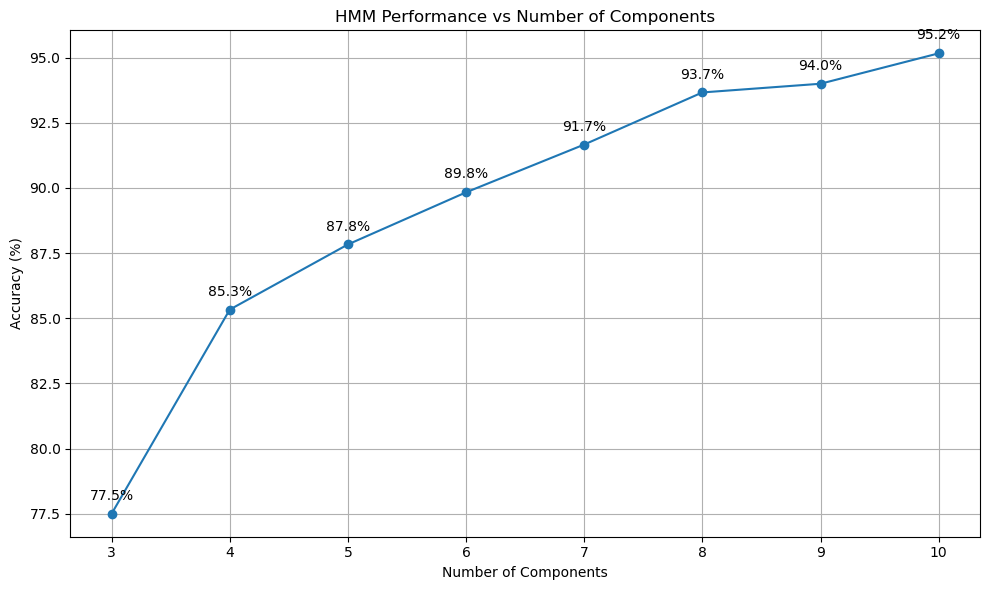


Best performance achieved with 10 components: 95.17%


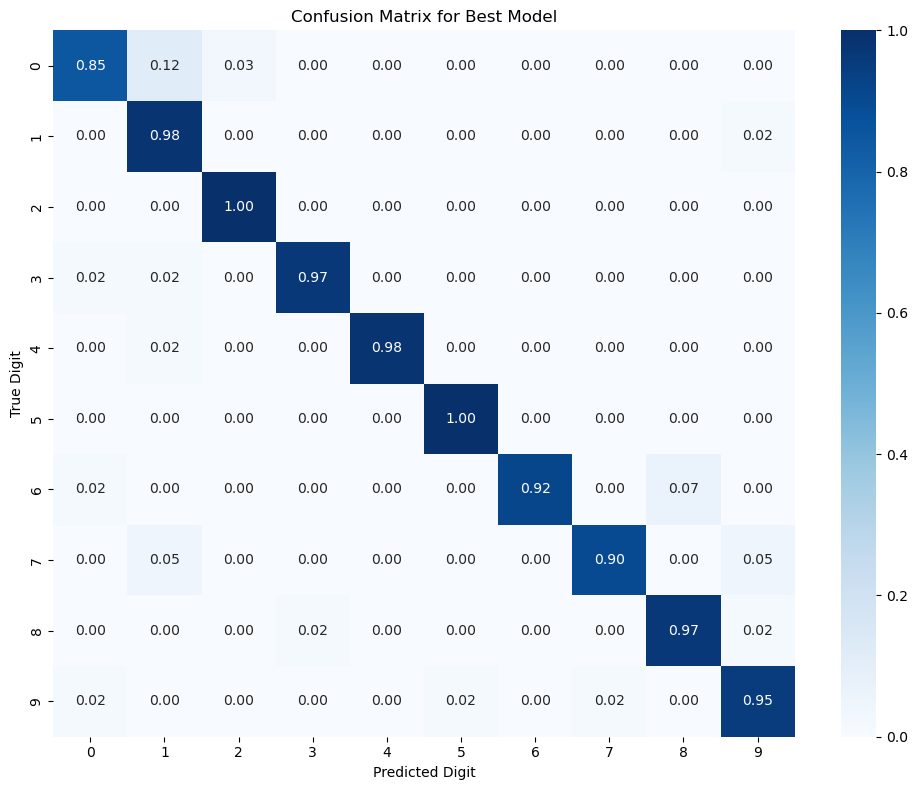

In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def train_and_evaluate_hmm(train_data, test_data, n_components):

    models = {}
    for digit, mfcc_list in train_data.items():
        X = np.concatenate(mfcc_list)
        lengths = [len(mfcc) for mfcc in mfcc_list]
        
        model = hmm.GaussianHMM(
            n_components=n_components, 
            covariance_type='diag', 
            n_iter=100, 
        )
        model.fit(X, lengths)
        models[digit] = model
    
    correct = 0
    total = 0
    for digit, mfcc_list in test_data.items():
        for mfcc in mfcc_list:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) 
                     for model_digit, model in models.items()}
            
            predicted_digit = max(scores, key=scores.get)
            if predicted_digit == digit:
                correct += 1
            total += 1
    
    accuracy = correct / total
    return accuracy, models

results = {}
best_accuracy = 0
best_models = None
best_n_components = None

for n_components in tqdm(range(3, 11)):
    accuracy, models = train_and_evaluate_hmm(train_data, test_data, n_components)
    print("check")
    results[n_components] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_models = models
        best_n_components = n_components
    
    print(f"Components: {n_components}, Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))
components = list(results.keys())
accuracies = [results[n] * 100 for n in components]

plt.plot(components, accuracies, marker='o')
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.title('HMM Performance vs Number of Components')

for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.1f}%', 
                (components[i], acc),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()

print(f"\nBest performance achieved with {best_n_components} components: {best_accuracy * 100:.2f}%")

def create_confusion_matrix(models, test_data):
    digits = sorted(test_data.keys())
    n_digits = len(digits)
    confusion_matrix = np.zeros((n_digits, n_digits))
    
    for true_idx, true_digit in enumerate(digits):
        for mfcc in test_data[true_digit]:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) 
                     for model_digit, model in models.items()}
            pred_digit = max(scores, key=scores.get)
            pred_idx = digits.index(pred_digit)
            
            confusion_matrix[true_idx][pred_idx] += 1
    
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, 
                annot=True, 
                fmt='.2f',
                xticklabels=digits,
                yticklabels=digits,
                cmap='Blues')
    plt.title('Confusion Matrix for Best Model')
    plt.xlabel('Predicted Digit')
    plt.ylabel('True Digit')
    plt.tight_layout()
    plt.show()
    
    return confusion_matrix

conf_matrix = create_confusion_matrix(best_models, test_data)

### 3.4 My Voice

In [ ]:
my_voice = {str(digit): [] for digit in range(10)}
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','data', 'external' ,'my_speech'))
for filename in os.listdir(data_path):
    if filename.endswith(".wav"):
        digit = filename[0]  
        file_path = os.path.join(data_path, filename)
        y, sr = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc = mfccs.T
        my_voice[digit].append(mfcc)

models = {}
for digit, mfcc_list in train_data.items():
    X = np.concatenate(mfcc_list)
    lengths = [len(mfcc) for mfcc in mfcc_list]
    model = hmm.GaussianHMM(n_components=3, covariance_type='diag', n_iter=100)
    model.fit(X, lengths)
    models[digit] = model

def evaluate_model(models, test_data):
    correct = 0
    total = 0
    for digit, mfcc_list in test_data.items():
        for mfcc in mfcc_list:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) for model_digit, model in models.items()}
            
            predicted_digit = max(scores, key=scores.get)
            if predicted_digit == digit:
                correct += 1
            total += 1
    return correct / total

accuracy = evaluate_model(models, my_voice)
print(f"Recognition Accuracy on Test Set: {accuracy * 100:.2f}%")


Recognition Accuracy on Test Set: 30.00%


In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def train_and_evaluate_hmm(train_data, test_data, n_components):

    models = {}
    for digit, mfcc_list in train_data.items():
        X = np.concatenate(mfcc_list)
        lengths = [len(mfcc) for mfcc in mfcc_list]
        
        model = hmm.GaussianHMM(
            n_components=n_components, 
            covariance_type='diag', 
            n_iter=100, 
        )
        model.fit(X, lengths)
        models[digit] = model
    
    correct = 0
    total = 0
    for digit, mfcc_list in test_data.items():
        for mfcc in mfcc_list:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) 
                     for model_digit, model in models.items()}
            
            predicted_digit = max(scores, key=scores.get)
            if predicted_digit == digit:
                correct += 1
            total += 1
    
    accuracy = correct / total
    return accuracy, models

results = {}
best_accuracy = 0
best_models = None
best_n_components = None

for n_components in tqdm(range(3, 11)):
    accuracy, models = train_and_evaluate_hmm(train_data, test_data, n_components)
    print("check")
    results[n_components] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_models = models
        best_n_components = n_components
    
    print(f"Components: {n_components}, Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))
components = list(results.keys())
accuracies = [results[n] * 100 for n in components]

plt.plot(components, accuracies, marker='o')
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.title('HMM Performance vs Number of Components')

for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.1f}%', 
                (components[i], acc),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()

print(f"\nBest performance achieved with {best_n_components} components: {best_accuracy * 100:.2f}%")

def create_confusion_matrix(models, test_data):
    digits = sorted(test_data.keys())
    n_digits = len(digits)
    confusion_matrix = np.zeros((n_digits, n_digits))
    
    for true_idx, true_digit in enumerate(digits):
        for mfcc in test_data[true_digit]:
            X = np.concatenate([mfcc])
            lengths = [len(mfcc)]
            
            scores = {model_digit: model.score(X, lengths) 
                     for model_digit, model in models.items()}
            pred_digit = max(scores, key=scores.get)
            pred_idx = digits.index(pred_digit)
            
            confusion_matrix[true_idx][pred_idx] += 1
    
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, 
                annot=True, 
                fmt='.2f',
                xticklabels=digits,
                yticklabels=digits,
                cmap='Blues')
    plt.title('Confusion Matrix for Best Model')
    plt.xlabel('Predicted Digit')
    plt.ylabel('True Digit')
    plt.tight_layout()
    plt.show()
    
    return confusion_matrix

conf_matrix = create_confusion_matrix(best_models, test_data)

## 4. RNN

### 4.1.1 Dataset (10)

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class BitSequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

def generate_dataset(num_samples=100000, min_length=1, max_length=16):

    num_lengths = max_length - min_length + 1

    samples_per_length = num_samples // num_lengths
    
    sequences = []
    labels = []
    
    for length in range(min_length, max_length + 1):
        for _ in range(samples_per_length):
            sequence = np.random.randint(0, 2, size=length)
            label = np.sum(sequence)
            seq_str = ''.join(map(str, sequence))
            sequences.append(seq_str)
            labels.append(label)
    
    indices = np.random.permutation(len(sequences))
    sequences = [sequences[i] for i in indices]
    labels = [labels[i] for i in indices]
    
    return sequences, labels

sequences, labels = generate_dataset()

dataset = BitSequenceDataset(sequences, labels)

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator()
)

for i in range(5):
    seq, count = dataset[i]
    print(f"Sequence: {seq}, Count of 1's: {count}")

print("\nDataset Split Sizes:")
print(f"Training: {len(train_dataset)}")
print(f"Validation: {len(val_dataset)}")
print(f"Test: {len(test_dataset)}")

Sequence: 0010011000001, Count of 1's: 4
Sequence: 0101, Count of 1's: 2
Sequence: 000110000, Count of 1's: 2
Sequence: 110011, Count of 1's: 4
Sequence: 0101111001, Count of 1's: 6

Dataset Split Sizes:
Training: 80000
Validation: 10000
Test: 10000


In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Dataset, random_split
import warnings

warnings.filterwarnings("ignore")

def sequence_to_tensor(sequence):
    return torch.tensor([int(bit) for bit in sequence], dtype=torch.float32)


def collate_fn_single(batch):
    
    sequence, label = batch[0]  
    sequence_tensor = sequence_to_tensor(sequence)  
    label_tensor = torch.tensor(label, dtype=torch.float32)
    return sequence_tensor.unsqueeze(-1), label_tensor


class BitSequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        seq = sequence_to_tensor(self.sequences[idx])
        label = torch.tensor(self.labels[idx], dtype=torch.float32) 
        return seq.unsqueeze(-1), label

class BitCountingRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.0):
        super(BitCountingRNN, self).__init__()
        self.rnn = nn.RNN(
            input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh', dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        _, h_n = self.rnn(x)  
        out = self.fc(h_n[-1])  
        return out

def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    epoch_loss = 0.0
    
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = model(sequences)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)

def evaluate(model, loader, criterion, device):
    model.eval()
    epoch_loss = 0.0
    with torch.no_grad():
        for sequences, labels in loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), labels)
            epoch_loss += loss.item()
    return epoch_loss / len(loader)

def train_and_evaluate(model, train_loader, val_loader, test_loader, criterion, optimizer, epochs, device):
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss = evaluate(model, val_loader, criterion, device)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    test_loss = evaluate(model, test_loader, criterion, device)
    print(f"Test Loss: {test_loss:.4f}")

def generate_dataset(num_samples=100000, min_length=1, max_length=16):
    sequences, labels = [], []
    num_lengths = max_length - min_length + 1
    samples_per_length = num_samples // num_lengths

    for length in range(min_length, max_length + 1):
        for _ in range(samples_per_length):
            sequence = np.random.randint(0, 2, size=length)
            label = np.sum(sequence)
            sequences.append(''.join(map(str, sequence)))
            labels.append(label)
    
    indices = np.random.permutation(len(sequences))
    sequences = [sequences[i] for i in indices]
    labels = [labels[i] for i in indices]
    return sequences, labels

input_size = 1
hidden_size = 32
output_size = 1
num_layers = 2
dropout = 0.2
learning_rate = 0.001
epochs = 5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sequences, labels = generate_dataset()

dataset = BitSequenceDataset(sequences, labels)
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size], generator=torch.Generator()
)

batch_size = 1

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_fn_single)
val_loader = DataLoader(val_dataset, batch_size=1, collate_fn=collate_fn_single)
test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=collate_fn_single)


model = BitCountingRNN(input_size, hidden_size, output_size, num_layers, dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_and_evaluate(model, train_loader, val_loader, test_loader, criterion, optimizer, epochs, device)

Epoch 1/5, Train Loss: 0.1125, Validation Loss: 0.0014
Epoch 2/5, Train Loss: 0.0066, Validation Loss: 0.0007
Epoch 3/5, Train Loss: 0.0046, Validation Loss: 0.0008
Epoch 4/5, Train Loss: 0.0030, Validation Loss: 0.0002
Epoch 5/5, Train Loss: 0.0026, Validation Loss: 0.0005
Test Loss: 0.0004


In [10]:
for batch in test_loader:
    sequences, labels = batch
    outputs = model(sequences)
    pred = outputs.squeeze().round().int()
    accuracy = (pred == labels).item()
    
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


### 4.1.4. Generalization

Sequence Length:  1, MSE Loss: 0.0005, MAE: 0.0213
Sequence Length:  2, MSE Loss: 0.0000, MAE: 0.0044
Sequence Length:  3, MSE Loss: 0.0000, MAE: 0.0045
Sequence Length:  4, MSE Loss: 0.0000, MAE: 0.0062
Sequence Length:  5, MSE Loss: 0.0000, MAE: 0.0049
Sequence Length:  6, MSE Loss: 0.0000, MAE: 0.0039
Sequence Length:  7, MSE Loss: 0.0000, MAE: 0.0032
Sequence Length:  8, MSE Loss: 0.0000, MAE: 0.0031
Sequence Length:  9, MSE Loss: 0.0000, MAE: 0.0031
Sequence Length: 10, MSE Loss: 0.0000, MAE: 0.0035
Sequence Length: 11, MSE Loss: 0.0000, MAE: 0.0038
Sequence Length: 12, MSE Loss: 0.0002, MAE: 0.0049
Sequence Length: 13, MSE Loss: 0.0002, MAE: 0.0055
Sequence Length: 14, MSE Loss: 0.0007, MAE: 0.0083
Sequence Length: 15, MSE Loss: 0.0017, MAE: 0.0137
Sequence Length: 16, MSE Loss: 0.0019, MAE: 0.0145
Sequence Length: 17, MSE Loss: 0.0070, MAE: 0.0265
Sequence Length: 18, MSE Loss: 0.0205, MAE: 0.0494
Sequence Length: 19, MSE Loss: 0.0593, MAE: 0.0844
Sequence Length: 20, MSE Loss: 

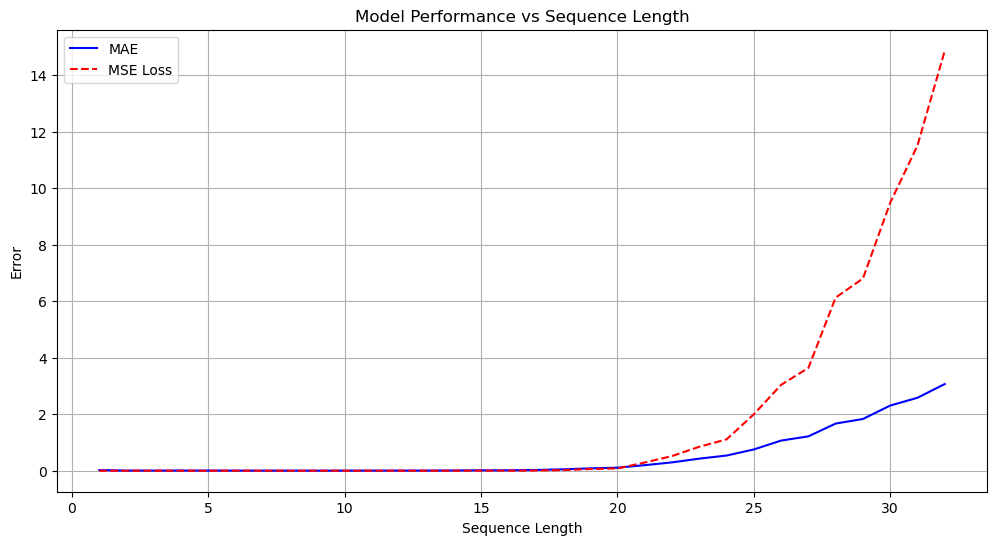

In [11]:
import torch
from torch.utils.data import DataLoader
import numpy as np

def collate_fn(batch):
    sequences = [sequence_to_tensor(item[0]).unsqueeze(-1) for item in batch]  
    labels = torch.tensor([item[1] for item in batch], dtype=torch.float32)   
    return torch.stack(sequences), labels

results = []

for i in range(1, 33):
    sequences, labels = generate_dataset(num_samples=1000, min_length=i, max_length=i)
    dataset = BitSequenceDataset(sequences, labels)
    data_loader = DataLoader(dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)
    
    model.eval()
    loss = evaluate(model, data_loader, criterion, device)
    
    total_mae = 0.0
    total_samples = 0
    
    with torch.no_grad():
        for batch_sequences, batch_labels in data_loader:
            batch_sequences = batch_sequences.to(device)
            batch_labels = batch_labels.to(device)
            
            predictions = model(batch_sequences).squeeze()
            
            batch_mae = torch.abs(predictions - batch_labels).sum().item()
            total_mae += batch_mae
            total_samples += batch_labels.size(0) 

    average_mae = total_mae / total_samples
    
    results.append({
        'sequence_length': i,
        'mse_loss': loss,
        'mae': average_mae
    })
    
    print(f"Sequence Length: {i:2d}, MSE Loss: {loss:.4f}, MAE: {average_mae:.4f}")

import pandas as pd
df = pd.DataFrame(results)
print("\nSummary Statistics:")
print(df.describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['sequence_length'], df['mae'], 'b-', label='MAE')
plt.plot(df['sequence_length'], df['mse_loss'], 'r--', label='MSE Loss')
plt.xlabel('Sequence Length')
plt.ylabel('Error')
plt.title('Model Performance vs Sequence Length')
plt.legend()
plt.grid(True)
plt.show()


### 4.2 Optical Character Recognition

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence